# Exercício - Kmeans - Dados Tabulares

Este caso requer o desenvolvimento de uma segmentação de clientes para definir a estratégia de marketing. O conjunto de dados da amostra resume o comportamento de uso de cerca de 9.000 portadores de cartão de crédito ativos durante os últimos 6 meses. O arquivo está no nível do cliente com 18 variáveis comportamentais.

## 1. Carregando os Dados

Importando a bibliteca necessária para carregar o banco de dados:

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

Carregando e exibindo o banco de dados:

In [2]:
df = pd.read_csv(r'C:\Users\arnon\Documents\DNC\Exercícios\Clustering - Modelos Não Supervisionados I\CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Descrição das _features_ do dataset:

* __CUSTID__: identificação do titular do cartão de crédito (categórico)
* __BALANCE__: saldo valor restante na conta do titular para fazer compras
* __BALANCE_FREQUENCY__: a frequência na qual BALANCE é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)
* __PURCHASES__: quantidade de compras realizadas na conta
* __ONEOFF_PURCHASES__: valor máximo de compra feito de uma só vez
* __INSTALLMENTS_PURCHASES__: valor da compra parcelada
* __CASH_ADVANCE__: dinheiro adiantado dado pelo usuário
* __PURCHASES_FREQUENCY__: frequência na qual as compras estão sendo feitas, pontuação entre 0 e 1 (1 = comprado com frequência, 0 = comprado com pouca frequência)
* __ONEOFF_PURCHASES_FREQUENCY__: frequência na qual as compras acontecem de uma só vez (1 = compradas com frequência, 0 = compradas sem frequência)
* __PURCHASES_INSTALLMENTS_FREQUENCY__: frequência na qual as compras parceladas estão sendo feitas (1 = feitas com frequência, 0 = feitas com pouca frequência)
* __CASH_ADVANCE_FREQUENCY__: frequência na qual o dinheiro adiantado está sendo pago
* __CASH_ADVANCE_TRX__: número de transações feitas com "CASH_ADVANCE"
* __PURCHASES_TRX__: número de transações de compra realizadas
* __CREDIT_LIMIT__: limite de cartão de crédito para usuário
* __PAYMENTS__: valor do pagamento realizado pelo usuário
* __MINIMUM_PAYMENTS__: valor mínimo de pagamentos feitos pelo usuário
* __PRCFULLPAYMENT__: porcentagem do pagamento integral realizada pelo usuário
* __TENURE__: posse do serviço de cartão de crédito para o usuário

## 2. Análise Preliminar dos Dados

Tamanho do banco de dados:

In [3]:
df.shape

(8950, 18)

Percentual de nulos de cada coluna:

In [4]:
(df.isnull().sum()*100/len(df)).sort_values(ascending = False)

MINIMUM_PAYMENTS                    3.497207
CREDIT_LIMIT                        0.011173
CUST_ID                             0.000000
BALANCE                             0.000000
PRC_FULL_PAYMENT                    0.000000
PAYMENTS                            0.000000
PURCHASES_TRX                       0.000000
CASH_ADVANCE_TRX                    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_FREQUENCY                 0.000000
CASH_ADVANCE                        0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
PURCHASES                           0.000000
BALANCE_FREQUENCY                   0.000000
TENURE                              0.000000
dtype: float64

Tipos de dados:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Análise descritiva dos dados:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## 3. Análise Gráfica dos Dados

Importando as biblitecas necessárias:

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Separando as colunas categóricas e numéricas:

In [8]:
cols_cat = df.select_dtypes(include = 'object').columns.tolist()
cols_num = df.select_dtypes(exclude = 'object').columns.tolist()

In [9]:
cols_cat

['CUST_ID']

In [10]:
cols_num

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE']

Gráficos de distribuição:

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


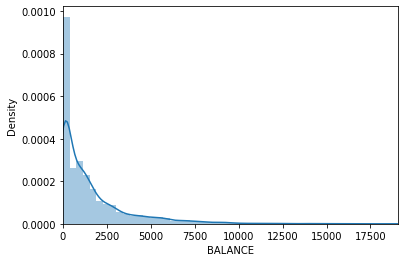

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


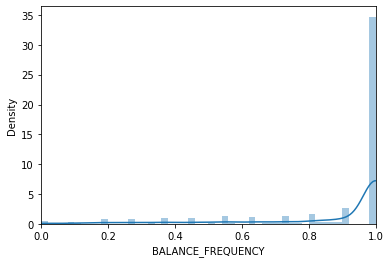

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


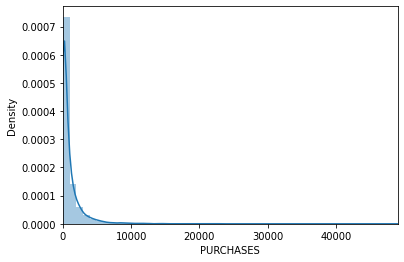

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


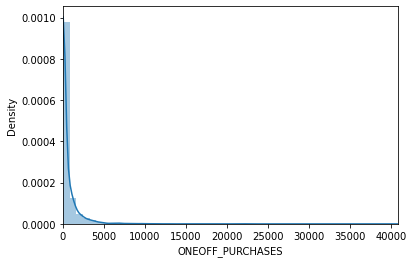

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


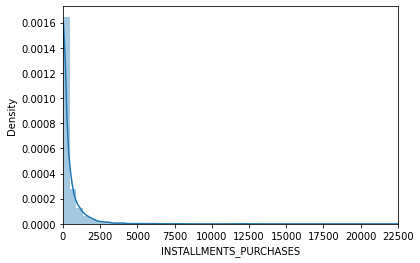

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


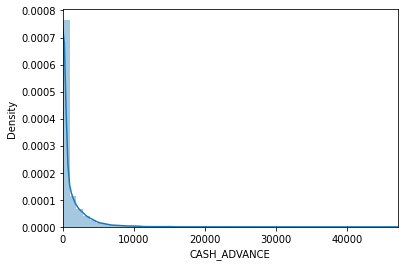

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


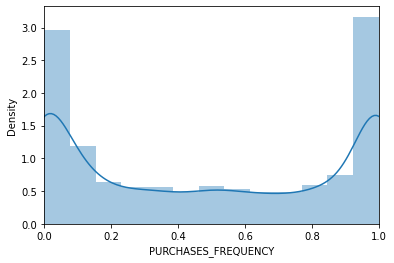

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


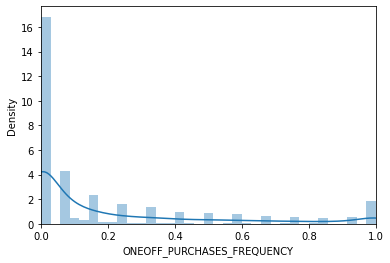

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


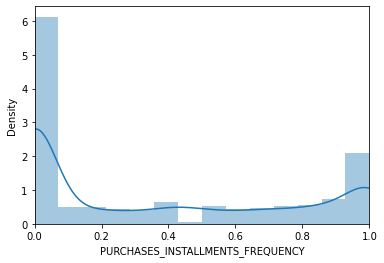

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


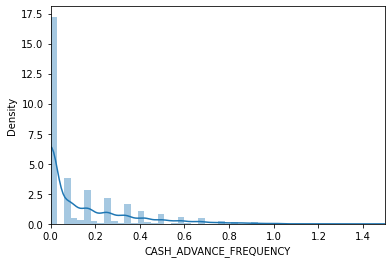

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


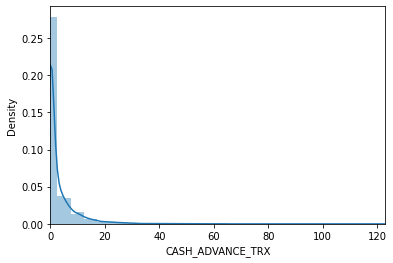

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


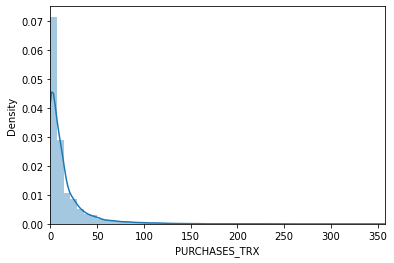

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


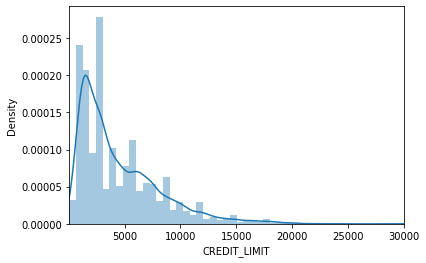

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


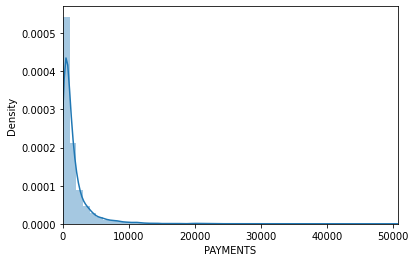

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


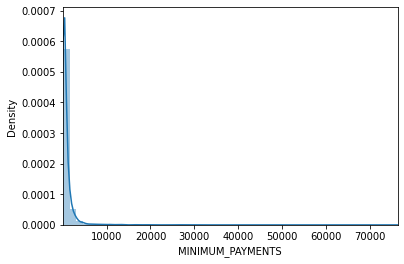

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


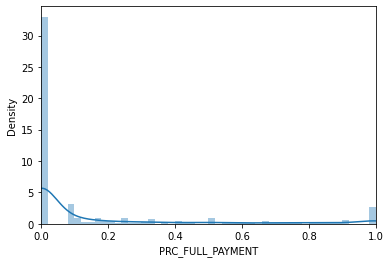

C:\Users\arnon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


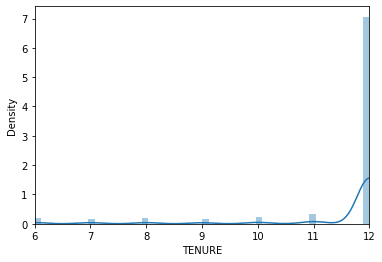

In [11]:
for i in cols_num:
    fig, ax = plt.subplots()
    sns.distplot(df[i], ax = ax)
    ax.set_xlim(left = df[i].min(), right = df[i].max())
    plt.show()

Gráficos de _boxplot_:

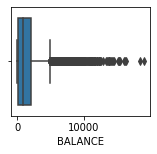

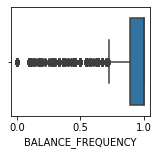

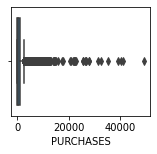

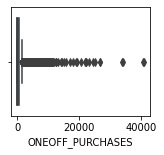

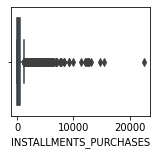

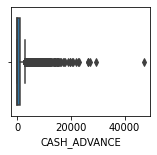

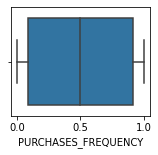

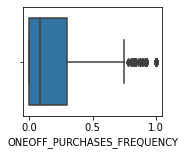

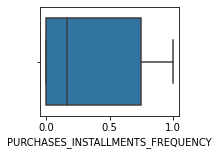

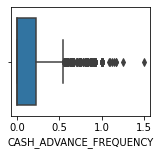

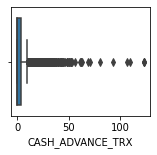

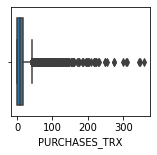

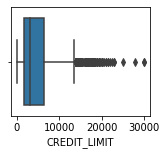

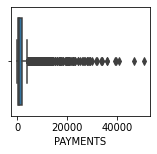

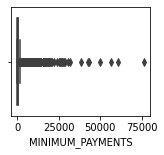

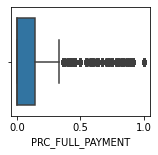

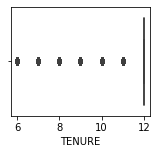

In [12]:
for i in cols_num:
    plt.figure(figsize = (2.5,2))
    sns.boxplot(x = df[i])
    plt.show()

## 4. Tratando os _Outliers_

Calculando os quartis:

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

Verificando a percentual de _outliers_ em cada coluna:

In [14]:
((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())*100/len(df)).sort_values(ascending = False)

C:\Users\arnon\AppData\Local\Temp\ipykernel_15540\3347724800.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum())*100/len(df)).sort_values(ascending = False)


BALANCE_FREQUENCY                   16.681564
PRC_FULL_PAYMENT                    16.469274
TENURE                              15.262570
CASH_ADVANCE                        11.508380
ONEOFF_PURCHASES                    11.318436
INSTALLMENTS_PURCHASES               9.687151
MINIMUM_PAYMENTS                     9.396648
PAYMENTS                             9.027933
PURCHASES                            9.027933
CASH_ADVANCE_TRX                     8.983240
ONEOFF_PURCHASES_FREQUENCY           8.737430
PURCHASES_TRX                        8.558659
BALANCE                              7.765363
CASH_ADVANCE_FREQUENCY               5.865922
CREDIT_LIMIT                         2.770950
CUST_ID                              0.000000
PURCHASES_FREQUENCY                  0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
dtype: float64